In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report


In [2]:
df = pd.read_csv('Alphabets_data.csv')
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


##eda and preprocessing

In [3]:
df.describe()  # basic data description

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [4]:
df.info() # all the colums are numerical except first one .

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [5]:
df.isna().sum()  # no null values in this dataset

,0
letter,0
xbox,0
ybox,0
width,0
height,0
onpix,0
xbar,0
ybar,0
x2bar,0
y2bar,0


##standardization

In [6]:
# applying standardization for scaling the values in the same scale

In [7]:
scaler = StandardScaler() # creating instance of scaler class


In [8]:
# splitting columns
X = df.drop('letter', axis=1)
y = df['letter']

In [9]:
encoder = LabelBinarizer()
y = encoder.fit_transform(df['letter'])
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [10]:
# Scale numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [11]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Model building

In [12]:
# create instance of Sequential class
model = Sequential()
# create neurons in input, hidden and output layers and assign random weights to input
# In I/P layer 16 neurons will be there as there are 16 independent features

#Add output layer
model.add(Dense(units=26, activation='softmax'))# for binary classification use sigmoid activation in output layer

#Establish the connection between the layers
model.compile(optimizer = 'adadelta',loss='categorical_crossentropy',metrics=['accuracy'])# adadelta is gradient descent algorithm for weight updation which we have selected randomly. We will hypertune it afterwards
# binary_crossentropy: also called log_loss, finds erros, range is 0 to 1


#Fit the data, perform forward and back propagation
model.fit(X_train,y_train, epochs=100)

Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0343 - loss: 3.6202
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0363 - loss: 3.6178
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0333 - loss: 3.6373
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0326 - loss: 3.6158
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0361 - loss: 3.6124
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0354 - loss: 3.6160
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0342 - loss: 3.6111
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0358 - loss: 3.6041
Epoch 9/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0370 - loss: 3.6054
Epoch 10/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0367 - loss: 3.6089
Epoch 11/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0380 - loss: 3.6047
Epoch 12/100
500/500 ━━━━━━━━━━━━━━━━━━━━

In [13]:
X_test

array([[-0.53500387, -0.31336316, -0.06048579, ..., -0.8656262 ,
         1.288757  , -1.11361878],
       [-0.01230945,  1.19973756,  0.43590966, ...,  1.7205521 ,
         1.288757  , -1.73188371],
       [-0.53500387, -0.91860345, -0.06048579, ..., -1.51217078,
        -0.65903564,  0.12291107],
       ...,
       [ 0.51038497,  0.89711742,  0.93230511, ..., -0.21908163,
         0.12008142,  0.12291107],
       [-0.01230945, -0.6159833 , -0.06048579, ...,  1.07400752,
         2.06787406, -1.73188371],
       [-1.0576983 , -0.6159833 , -0.55688123, ...,  1.7205521 ,
        -0.65903564,  0.12291107]])

In [14]:
# accuracy is not good it needs hyperparameter tuning
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy: {accuracy}")

Accuracy: 0.05824999883770943


#Hyperparameter Tuning

In [18]:
!pip install -U keras-tuner
!pip install scikeras
from scikeras.wrappers import KerasRegressor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.8 MB/s eta 0:00:00


In [19]:
import keras_tuner as kt
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


# Function to create the model
def create_model(activation='relu', neurons=32):
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_dim=X_train.shape[1]))
    model.add(Dense(26, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create a KerasClassifier
model = KerasClassifier(model=create_model, verbose=0)

# Define a simpler hyperparameter grid
param_grid = {
    'model__activation': ['relu', 'sigmoid'],
    'model__neurons': [32, 64],
    'epochs': [20,30]
}

# Create GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

# Fit the grid search (this might still take some time)
grid_result = grid.fit(X_train, y_train)

# Print the best results
print(f"Best Accuracy: {grid_result.best_score_}")
print(f"Best Params: {grid_result.best_params_}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

Best Accuracy: 0.9043752336133307
Best Params: {'epochs': 30, 'model__activation': 'relu', 'model__neurons': 64}


In [21]:
y_pred = grid_result.predict(X_test)  # Get predictions from the best model
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels
y_true_classes = np.argmax(y_test, axis=1)  # Convert true labels to class labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.927
Precision: 0.9287182929978103
Recall: 0.927
F1-Score: 0.9270589835355836


In [22]:
# now here we getting 90% accuracy.

As we can see our model before hyperparameter tuning was giving very low accuracy and after model tuning it is giving accuraccy around 90%


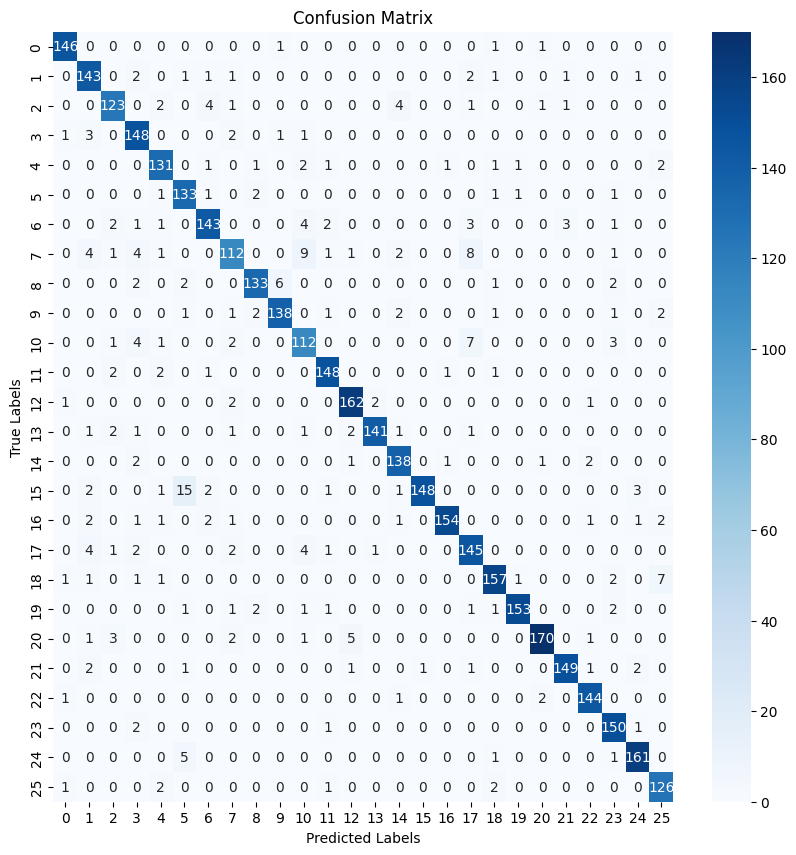

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

The developed model demonstrated good performance in recognizing alphabets. The hyperparameter tuning process significantly improved accuracy.